# Introduction to Artificial Neural Networks with Keras

## Make training data

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

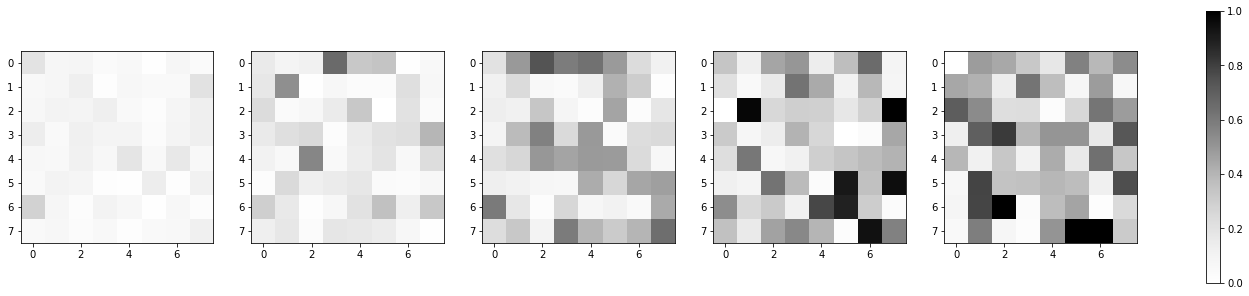

In [20]:
dim = (8, 8)
stacknum = 5

zeros = np.zeros(dim)
whites = zeros + np.abs(np.random.randn(5, *dim)) * (np.arange(1, stacknum+1)*.1)[:, None, None]
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
for i, ax in enumerate(axs.flat):
    ax.imshow(whites[i], cmap="Greys", vmin=0, vmax=1)
    
norm = Normalize(vmin=0, vmax=1)
im = cm.ScalarMappable(cmap="Greys", norm=norm)
fig.colorbar(im, ax=axs);

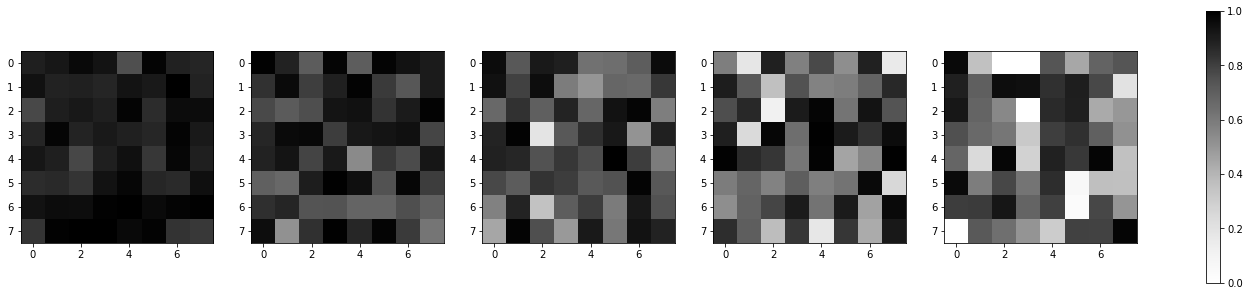

In [21]:
dim = (8, 8)
stacknum = 5

ones = np.ones(dim)
blacks = ones - np.abs(np.random.randn(5, *dim)) * (np.arange(1, stacknum+1)*.1)[:, None, None]
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
for i, ax in enumerate(axs.flat):
    ax.imshow(blacks[i], cmap="Greys", vmin=0, vmax=1)
    
norm = Normalize(vmin=0, vmax=1)
im = cm.ScalarMappable(cmap="Greys", norm=norm)
fig.colorbar(im, ax=axs);

### Get data

In [39]:
import tensorflow as tf
from tensorflow import keras

from keras.datasets.fashion_mnist import load_data
(X_train_full, y_train_full), (X_test, y_test) = load_data()

# get validation set
X_valid, y_valid = X_train_full[:5000]/255.0, y_train_full[:5000]
X_train, y_train = X_train_full[5000:]/255.0, y_train_full[5000:]
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", 
               "Sneaker", "Bag", "Ankle boot"]

y_names_train = [class_names[i] for i in y_train]

### Train model

In [23]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=X_valid[0].shape),
keras.layers.Dense(300, activation='relu'),
keras.layers.Dense(100, activation='relu'),
keras.layers.Dense(10, activation='softmax'),
                                ])


weights, biases = model.layers[1].get_weights()

model.compile(loss='sparse_categorical_crossentropy', optimizer="sgd", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7111 - accuracy: 0.7656 - val_loss: 0.5067 - val_accuracy: 0.8304
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4874 - accuracy: 0.8301 - val_loss: 0.4430 - val_accuracy: 0.8522
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4445 - accuracy: 0.8440 - val_loss: 0.4195 - val_accuracy: 0.8590
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4163 - accuracy: 0.8555 - val_loss: 0.4063 - val_accuracy: 0.8596
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3970 - accuracy: 0.8611 - val_loss: 0.3819 - val_accuracy: 0.8678
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3807 - accuracy: 0.8664 - val_loss: 0.3911 - val_accuracy: 0.8644
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3666 - accuracy: 0.8713 - val_loss: 0.3771 - val_accuracy:

<AxesSubplot:>

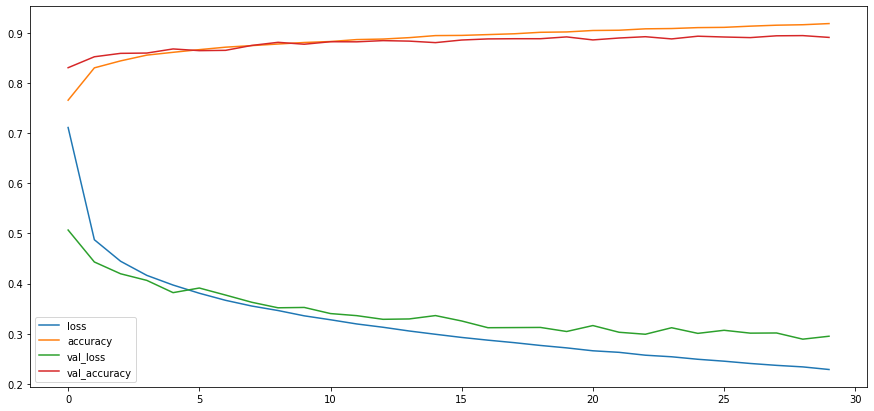

In [24]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(15, 7))

In [25]:
to_pred = X_test[:3]

prediction = model.predict(to_pred)
vals = np.argmax(prediction, axis=1)

[class_names[val] for val in vals]

['Ankle boot', 'Pullover', 'Trouser']

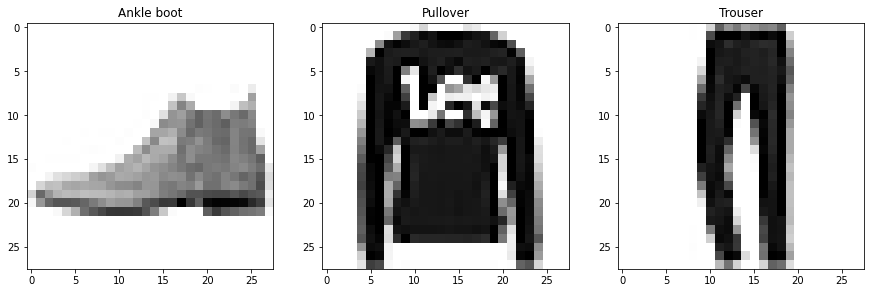

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in enumerate(axs.flat):
    ax.imshow(to_pred[i], cmap="Greys")
    ax.set_title(class_names[vals[i]])

## Regression MLP

Using california housing dataset

In [27]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

In [28]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [29]:
model = keras.models.Sequential([
     keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
     keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))


Epoch 1/20
363/363 [==============================] - 1s 909us/step - loss: 0.8151 - val_loss: 0.5448
Epoch 2/20
363/363 [==============================] - 0s 742us/step - loss: 0.5219 - val_loss: 0.4707
Epoch 3/20
363/363 [==============================] - 0s 750us/step - loss: 0.4782 - val_loss: 0.4453
Epoch 4/20
363/363 [==============================] - 0s 730us/step - loss: 0.4526 - val_loss: 0.4375
Epoch 5/20
363/363 [==============================] - 0s 750us/step - loss: 0.4446 - val_loss: 0.4258
Epoch 6/20
363/363 [==============================] - 0s 778us/step - loss: 0.4362 - val_loss: 0.4190
Epoch 7/20
363/363 [==============================] - 0s 746us/step - loss: 0.4694 - val_loss: 0.4124
Epoch 8/20
363/363 [==============================] - 0s 725us/step - loss: 0.4302 - val_loss: 0.4111
Epoch 9/20
363/363 [==============================] - 0s 722us/step - loss: 0.4208 - val_loss: 0.4240
Epoch 10/20
363/363 [==============================] - 0s 723us/step - loss: 0.417

In [30]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 600us/step - loss: 0.3802


In [31]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

In [32]:
y_pred

array([[2.3813152],
       [1.4061451],
       [1.4619586]], dtype=float32)

### wide & deep

build a network whose input connects to both the next layer and the output layer

In [33]:
X_train.shape[1:]

(8,)

### idk

In [34]:
input_ = keras.layers.Input(shape=X_train.shape[1:])  # Make an input layer, same neurons as # features
hidden1 = keras.layers.Dense(30, activation="relu")(input_)  # Take input layer, run it through 30 neurons with relu activation
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)  # take first layer, run it thorugh 30 neurons with relu activation
concat = keras.layers.Concatenate()([input_, hidden2])  # Create concattenated layer, connecting input layer and second layer
output = keras.layers.Dense(1)(concat)  # Take concatenated layer, get binary output
model = keras.Model(inputs=[input_], outputs=[output])  # Make a model

In [35]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_valid, y_valid))  # something fukd m8

Epoch 1/20


/Users/alex/.pyenv/versions/3.9.0/lib/python3.9/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 1s 1ms/step - loss: 1.9392 - val_loss: 0.8117
Epoch 2/20
363/363 [==============================] - 0s 834us/step - loss: 0.7679 - val_loss: 0.6894
Epoch 3/20
363/363 [==============================] - 0s 827us/step - loss: 0.6756 - val_loss: 0.6269
Epoch 4/20
363/363 [==============================] - 0s 784us/step - loss: 0.6207 - val_loss: 0.5864
Epoch 5/20
363/363 [==============================] - 0s 807us/step - loss: 0.5832 - val_loss: 0.5591
Epoch 6/20
363/363 [==============================] - 0s 800us/step - loss: 0.5564 - val_loss: 0.5411
Epoch 7/20
363/363 [==============================] - 0s 803us/step - loss: 0.5365 - val_loss: 0.5257
Epoch 8/20
363/363 [==============================] - 0s 850us/step - loss: 0.5217 - val_loss: 0.5130
Epoch 9/20
363/363 [==============================] - 0s 776us/step - loss: 0.5104 - val_loss: 0.5157
Epoch 10/20
363/363 [==============================] - 0s 791us/step - loss: 0.5017 - val_loss:

## Send subset of features through deep vs wide path

In [36]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)

model = keras.Model(inputs=[input_A, input_B], outputs=[output])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

# Separate dimensions for training data
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit(x=(X_train_A, X_train_B), y=y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.8265 - val_loss: 0.9121
Epoch 2/20
363/363 [==============================] - 0s 825us/step - loss: 0.8269 - val_loss: 0.7254
Epoch 3/20
363/363 [==============================] - 0s 837us/step - loss: 0.6998 - val_loss: 0.6475
Epoch 4/20
363/363 [==============================] - 0s 865us/step - loss: 0.6353 - val_loss: 0.6048
Epoch 5/20
363/363 [==============================] - 0s 826us/step - loss: 0.5970 - val_loss: 0.5722
Epoch 6/20
363/363 [==============================] - 0s 875us/step - loss: 0.5713 - val_loss: 0.5554
Epoch 7/20
363/363 [==============================] - 0s 836us/step - loss: 0.5534 - val_loss: 0.5392
Epoch 8/20
363/363 [==============================] - 0s 814us/step - loss: 0.5392 - val_loss: 0.5267
Epoch 9/20
363/363 [==============================] - 0s 826us/step - loss: 0.5280 - val_loss: 0.5239
Epoch 10/20
363/363 [==============================] - 0s 839us/step - loss: 0.5192 

In [37]:
y_pred

array([[2.4996083],
       [1.5954623],
       [1.1704826]], dtype=float32)

## Subclassing API

In [38]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output
        
model = WideAndDeepModel()
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(x=(X_train_A, X_train_B), y=y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 4.2764 - output_1_loss: 1.9073 - output_2_loss: 2.3692 - val_loss: 2.2625 - val_output_1_loss: 0.9304 - val_output_2_loss: 1.3321
Epoch 2/20
363/363 [==============================] - 0s 904us/step - loss: 1.9601 - output_1_loss: 0.8115 - output_2_loss: 1.1486 - val_loss: 1.7779 - val_output_1_loss: 0.7639 - val_output_2_loss: 1.0140
Epoch 3/20
363/363 [==============================] - 0s 892us/step - loss: 1.7200 - output_1_loss: 0.7276 - output_2_loss: 0.9924 - val_loss: 1.5996 - val_output_1_loss: 0.6909 - val_output_2_loss: 0.9087
Epoch 4/20
363/363 [==============================] - 0s 898us/step - loss: 1.5703 - output_1_loss: 0.6695 - output_2_loss: 0.9008 - val_loss: 1.4775 - val_output_1_loss: 0.6334 - val_output_2_loss: 0.8440
Epoch 5/20
363/363 [==============================] - 0s 891us/step - loss: 1.4596 - output_1_loss: 0.6234 - output_2_loss: 0.8362 - val_loss: 1.3834 - val_output_1_loss: 0.5917 